In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


Edge detection is a technique used to find the boundaries of objects in an image. It is a fundamental operation in image processing and computer vision, and has applications in a wide variety of fields, such as object recognition, machine learning, and medical imaging.

There are many different edge detection algorithms available, each with its own strengths and weaknesses. Some of the most popular algorithms include:

* **Sobel operator:** The Sobel operator is a simple but effective edge detector that uses a two-dimensional convolution kernel to calculate the gradient of an image.
* **Canny edge detector:** The Canny edge detector is a more sophisticated edge detector that uses a multi-stage algorithm to suppress noise and false edges.
* **Laplacian operator:** The Laplacian operator is a second-order differential operator that can be used to detect edges in an image.

Image gradients are a measure of the rate of change of an image intensity at a given point. They can be used to detect edges in an image, and are also used in other image processing tasks, such as image sharpening and noise reduction.

The gradient of an image can be calculated using a variety of methods, such as the Sobel operator, the Canny edge detector, or the Laplacian operator. Once the gradient of an image has been calculated, it can be used to identify edges by looking for regions of the image where the gradient is high.

Edge detection is a powerful tool that can be used to extract information from images. However, it is important to note that edge detection is not a perfect process, and it can sometimes produce false edges or miss real edges. Therefore, it is important to use edge detection in conjunction with other image processing techniques to improve the accuracy of the results.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


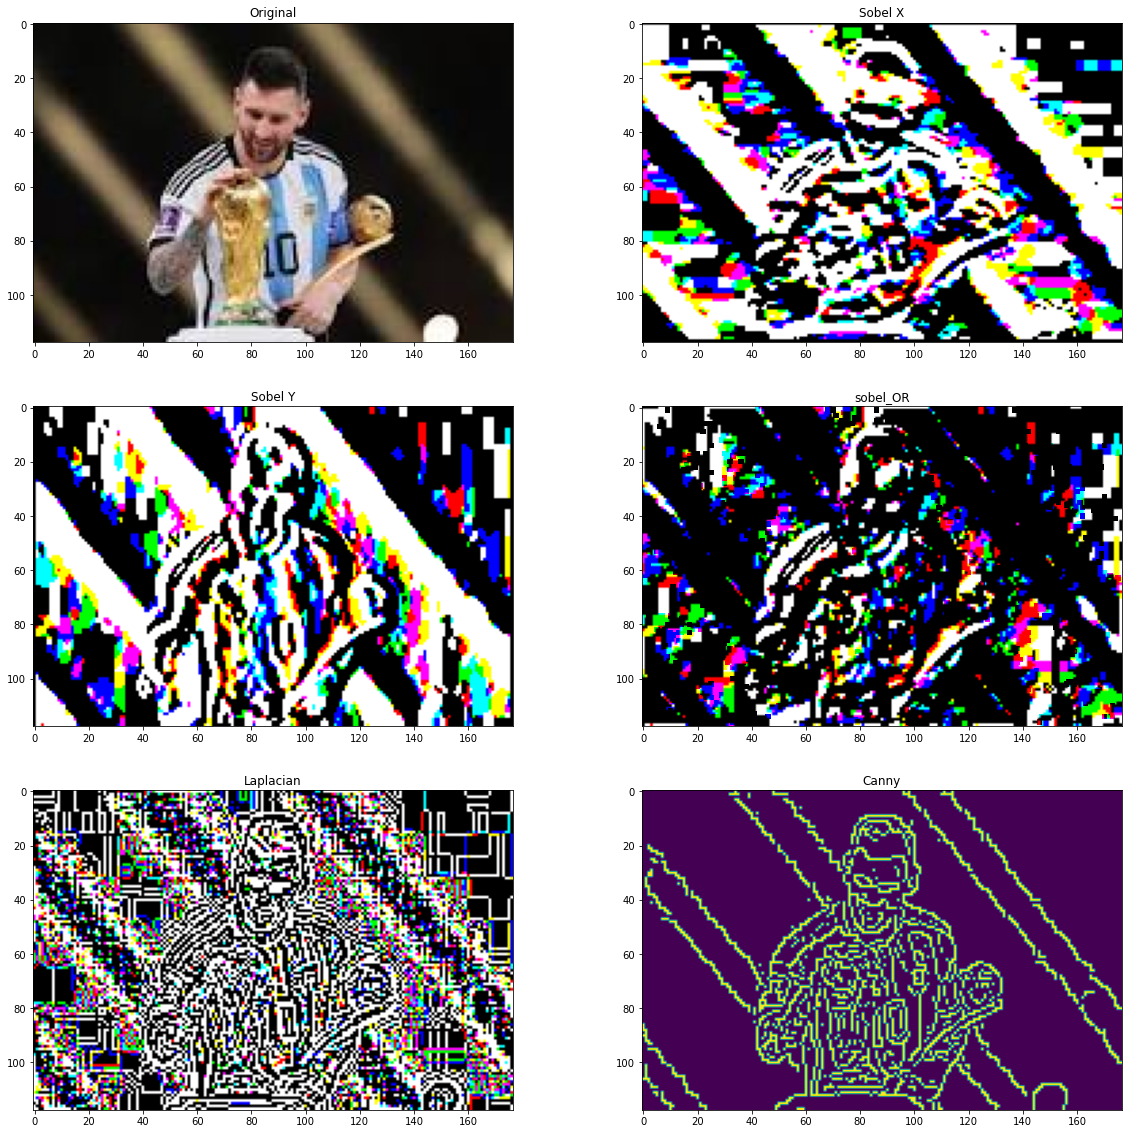

In [2]:
image = cv2.imread('C:\\Users\\hp\\Downloads\\messi.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width, _ = image.shape

# Extract Sobel Edges
sobel_x = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)

plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)

plt.subplot(3, 2, 2)
plt.title("Sobel X")
plt.imshow(sobel_x)


plt.subplot(3, 2, 3)
plt.title("Sobel Y")
plt.imshow(sobel_y)

sobel_OR = cv2.bitwise_or(sobel_x, sobel_y)

plt.subplot(3, 2, 4)
plt.title("sobel_OR")
plt.imshow(sobel_OR)

laplacian = cv2.Laplacian(image, cv2.CV_64F)

plt.subplot(3, 2, 5)
plt.title("Laplacian")
plt.imshow(laplacian)

##  Then, we need to provide two values: threshold1 and threshold2. Any gradient value larger than threshold2
# is considered to be an edge. Any value below threshold1 is considered not to be an edge. 
#Values in between threshold1 and threshold2 are either classiﬁed as edges or non-edges based on how their 
#intensities are “connected”. In this case, any gradient values below 60 are considered non-edges
#whereas any values above 120 are considered edges.

# Canny Edge Detection uses gradient values as thresholds
# The first threshold gradient
canny = cv2.Canny(image, 50, 120)

plt.subplot(3, 2, 6)
plt.title("Canny")
plt.imshow(canny)

A perspective transform is a geometric transformation that maps a 2D image to another 2D image such that the lines in the original image are parallel to the lines in the transformed image. This can be useful for tasks such as correcting for lens distortion or for aligning two images of the same scene taken from different viewpoints.

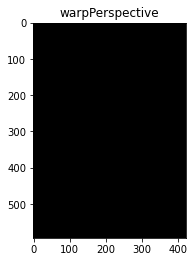

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('C:\\Users\\hp\\Downloads\\messi.jpeg')


# Cordinates of the 4 corners of the original image
points_A = np.float32([[320,15], [700,215], [85,610], [530,780]])

# Cordinates of the 4 corners of the desired output
# We use a ratio of an A4 Paper 1 : 1.41
points_B = np.float32([[0,0], [420,0], [0,594], [420,594]])
 
# Use the two sets of four points to compute 
# the Perspective Transformation matrix, M    
M = cv2.getPerspectiveTransform(points_A, points_B)
 
warped = cv2.warpPerspective(image, M, (420,594))

plt.subplot(1, 2, 2)
plt.title("warpPerspective")
plt.imshow(warped)